In [293]:
#basic library
import numpy as np     #mathematical array calculation
import pandas as pd    #reading dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [294]:
companies=pd.read_csv('1000_Companies.csv')   #read dataset

In [295]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [296]:
x=companies.iloc[:,:-1].values  #independent
y=companies.iloc[:,4].values    #dependent

<AxesSubplot:>

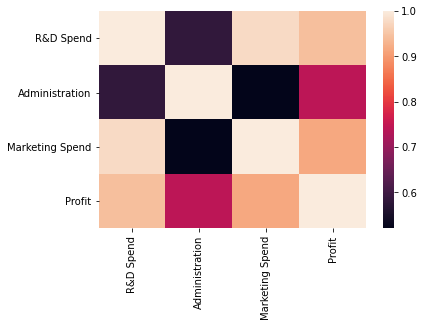

In [297]:
#visualization
#correlation matrix
sns.heatmap(companies.corr())

In [298]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('state', OneHotEncoder(), [3])], remainder='passthrough')
x= np.array(columnTransformer.fit_transform(x), dtype ='float64')

In [299]:
print(x[0])

[0.000000e+00 0.000000e+00 1.000000e+00 1.653492e+05 1.368978e+05
 4.717841e+05]


In [300]:
x=x[:,1:]  #to avoid dummy variable

In [301]:
print(x)

[[0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05 4.7178410e+05]
 [0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05 4.4389853e+05]
 [1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05 4.0793454e+05]
 ...
 [0.0000000e+00 0.0000000e+00 1.0027547e+05 2.4192631e+05 2.2714282e+05]
 [0.0000000e+00 0.0000000e+00 1.2845623e+05 3.2165214e+05 2.8169232e+05]
 [0.0000000e+00 1.0000000e+00 1.6118172e+05 2.7093986e+05 2.9544217e+05]]


In [303]:
#splitting train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [305]:
#Multiple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [307]:
y_pred=regressor.predict(x_test)
y_pred

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.8672561 ,
        83411.73042089, 110571.90200074, 132145.2293644 ,  91473.37719687,
       164597.05380606,  53222.82667402,  66950.1905099 , 150566.43987004,
       126915.20858596,  59337.85971051, 177513.91053061,  75316.28143052,
       118248.14406603, 164574.40699901, 170937.28981069, 182069.11645083,
       118845.03252689,  85669.95112229, 180992.59396143,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669092,  56881.41475225,
        68896.39346905, 210040.00765883, 120778.72270894, 111724.87157654,
       101487.90541518, 137959.02649623,  63969.95996744, 108857.91214126,
       186014.72531987, 171442.64130747, 174644.26529204, 117671.49128195,
        96731.37857434, 165452.25779409, 107724.34331255,  50194.54176914,
       116513.89532179,  58632.48986821, 158416.46827609,  78541.4852161 ,
       159727.66671743, 131137.87699644, 184880.70924515, 174609.08266879,
        93745.66352059,  

In [308]:
#CALCULATING COEFFICIENT
print(regressor.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [309]:
#claculate intercept
print(regressor.intercept_)

-51035.22972402812


In [311]:
#R squared value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9112695892268783